# Feedforward Neural Networks

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Non-linear Transfer Functions

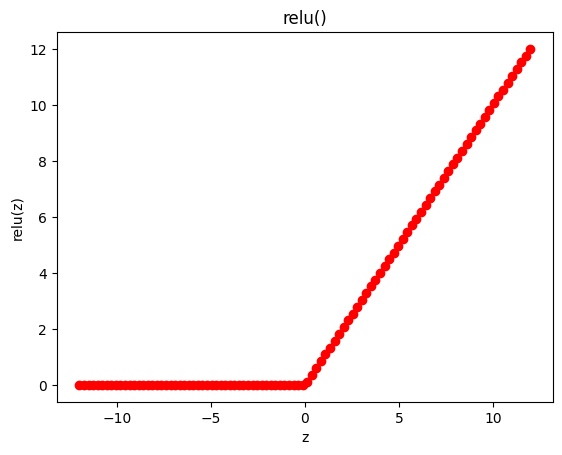

In [2]:
relu = lambda z: np.maximum(z,0)
in_array = np.linspace(-12, 12, 100) 
out_array = relu(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("relu()") 
plt.xlabel("z") 
plt.ylabel("relu(z)") 
plt.show() 

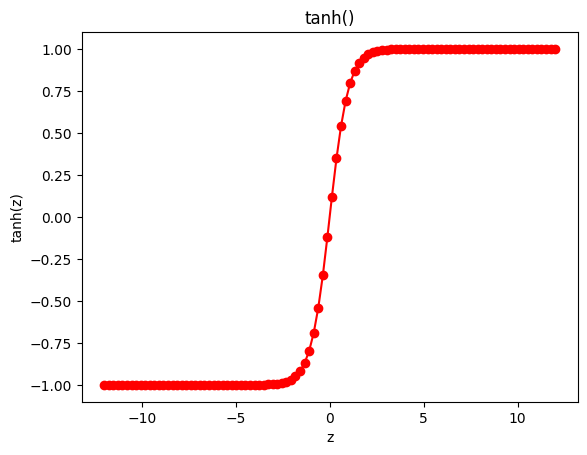

In [3]:
in_array = np.linspace(-12, 12, 100) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("tanh()") 
plt.xlabel("z") 
plt.ylabel("tanh(z)") 
plt.show() 

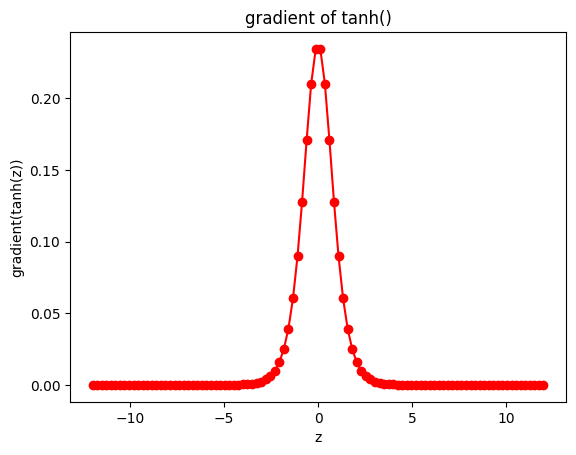

In [4]:
in_array = np.linspace(-12, 12, 100) 
out_array = np.tanh(in_array) 
gradient_array = np.gradient(out_array)
plt.plot(in_array, gradient_array, color = 'red', marker = "o") 
plt.title("gradient of tanh()") 
plt.xlabel("z") 
plt.ylabel("gradient(tanh(z))") 
plt.show() 

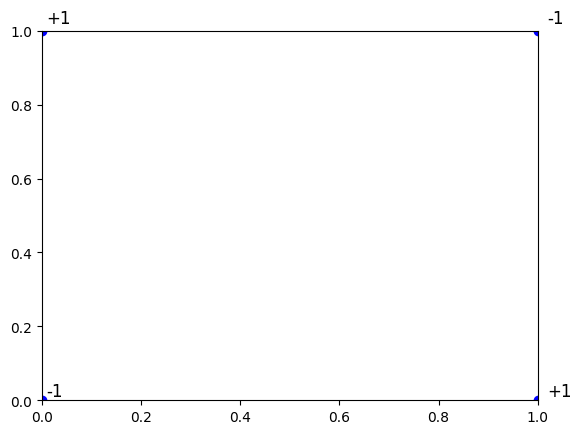

In [5]:
import matplotlib.pyplot as plt

x = [[0,0],[1,0],[0,1],[1,1]]
y = ['-1','+1','+1','-1']

for i in range(len(x)):
    x1 = x[i][0]
    x2 = x[i][1]
    plt.plot(x1, x2, 'bo')
    plt.text((x1+.01) * (1.01), (x2+.01) * (1.01) , y[i], fontsize=12)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

## XOR with a feedforward neural network


The XOR problem:

\begin{align}
x^1 &=& [0,0], y^1 = -1\\
x^2 &=& [0,1], y^2 = +1 \\
x^3 &=& [1,0], y^3 = +1\\
x^4 &=& [1,1], y^4 = -1
\end{align}


In [6]:
x = [ np.mat('0;0'), np.mat('1;0'), np.mat('0;1'), np.mat('1;1') ]

For examples $(x^i, y^i)$ for $i = 1,\ldots,4$ as defined previously for the feedforward neural network:

$$ \Pr(y \mid x; W, b, v) = \frac{exp\left(v(y) \cdot g(Wx + b) + \gamma_y \right)}{\sum_{y' \in {\cal Y}} exp\left(v(y') \cdot g(Wx + b) + \gamma_{y'})\right)} $$

where $x \in \mathbb{R}^2$ ($d=2$) and let $m=2$ so $W \in \mathbb{R}^{2\times2}$ and $b \in \mathbb{R}^2$ and $g$ is a ReLU transfer function.

Then there are parameter settings $v(-1)$, $v(+1)$, $\gamma_{-1}$, $\gamma_{+1}$, $W, b$ such that 

$$ p(y^i \mid x^i; v) > 0.5 \textrm{   for } i = 1, \ldots, 4 $$

In [7]:
W = np.mat('1.0, 1.0; 1.0, 1.0')
b = np.mat('0;-1')
for i, v in enumerate(x): 
    print("x_{}:\n{}".format(i, v))

x_0:
[[0]
 [0]]
x_1:
[[1]
 [0]]
x_2:
[[0]
 [1]]
x_3:
[[1]
 [1]]


$$ \Pr(y \mid x; W, b, v) = \frac{exp\left(v(y) \cdot g(z) + \gamma_y \right)}{\sum_{y' \in {\cal Y}} exp\left(v(y') \cdot g(z) + \gamma_{y'})\right)} $$

$$g(z) = g(Wx + b)$$

In [8]:
z = list(map(lambda x: W * x + b, x))
for i, v in enumerate(z): 
    print("z_{}:\n{}".format(i, v))

z_0:
[[ 0.]
 [-1.]]
z_1:
[[1.]
 [0.]]
z_2:
[[1.]
 [0.]]
z_3:
[[2.]
 [1.]]


$g$ is the ReLU transfer function $max(z,0)$

In [9]:
relu = lambda z: np.maximum(z,0)
h = list(map(relu, z))
for i, v in enumerate(h): 
    print("h_{}:\n{}".format(i, v))

h_0:
[[0.]
 [0.]]
h_1:
[[1.]
 [0.]]
h_2:
[[1.]
 [0.]]
h_3:
[[2.]
 [1.]]


\begin{align}
p(+1 \mid x; v) &=& \frac{exp(v(+1) \cdot h  + \gamma_{+1})}{exp(v(+1) \cdot h  + \gamma_{+1}) + exp(v(-1) \cdot h + \gamma_{-1})} \\
&=& \frac{1}{1 + exp(-(u \cdot h + \gamma))}
\end{align}

To satisfy $P(y^i \mid x^i; v) > 0.5$ for $i = 1,\ldots,4$
we have to find parameters $u = v(+1) - v(-1)$ and $\gamma = \gamma_{+1} - \gamma_{-1}$
such that:

\begin{align}
u \cdot [0,0] + \gamma &<& 0 \\
u \cdot [1,0] + \gamma &>& 0 \\
u \cdot [1,0] + \gamma &>& 0 \\
u \cdot [2,1] + \gamma &<& 0 \end{align}

$u = [1, -2]$ and $\gamma = -0.5$ satisfies these constraints.

In [20]:
u = np.mat('1,-2')
gamma = -0.5
results = list(map(lambda x: u * x + gamma, h))
for i in results:
    print(i)

[[-0.5]]
[[0.5]]
[[0.5]]
[[-0.5]]


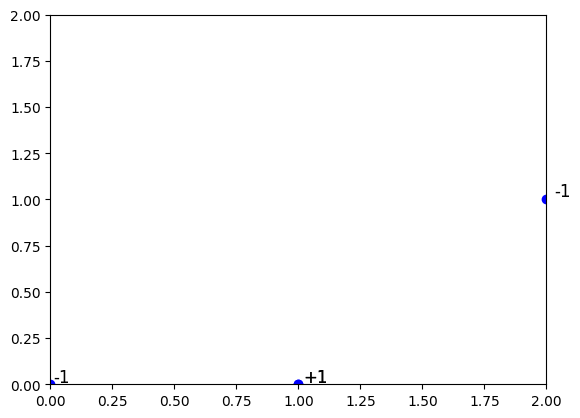

In [10]:
import matplotlib.pyplot as plt

x = [[0,0],[1,0],[1,0],[2,1]]
y = ['-1','+1','+1','-1']

for i in range(len(x)):
    x1 = x[i][0]
    x2 = x[i][1]
    plt.plot(x1, x2, 'bo')
    plt.text((x1+.01) * (1.01), (x2+.01) * (1.01) , y[i], fontsize=12)

plt.xlim((0, 2))
plt.ylim((0, 2))
plt.show()



In [49]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../css/notebook.css", "r").read()
    return HTML(styles)
css_styling()